L-Systems and Fractals 
============

In this document, I am going to illustrate the idea of using grammars to generate interesting visual drawings of famous fractal curves. Here is a cool example of a fractal or "self-similar" curve called the Koch snowflake.

You can see how the image is formed here: <https://upload.wikimedia.org/wikipedia/commons/6/65/Kochsim.gif>

More information about L-Systems here: https://en.wikipedia.org/wiki/L-system

The notebook below will illustrate how the fractal is formed. We will then use the idea of L-Systems to draw more fractals.

To begin with let us interpret characters with some _graphics actions_ as follows:

*F*: Move the cursor forward in the current direction and draw a line

*+*: Rotate  the direction of the cursor anti clockwise by a specified angle (say 60 degrees)

*-*: Rotate the direction of the cursor clockwise by a specified angle (say 120 degrees).

We will introduce two more commands `[` and `]` later.

The code below has a function 

> interpret_list_as_figure (cmd_list, length_factor, angles)

This function takes a list of commands `F`, `+`, `-` characters and a `length factor` that specifies how much to move forward on a `F` and a dictionary `angles` that specifies the rotation angles for `+` and `-`.



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import math

def interpret_list_as_figure(cmd_list, length_factor, angles):
    x,y = 0.0, 0.0 # This is the current cursor position
    theta = 0      # This is the current cursor angle
    position_stack = []
    for cmd in cmd_list:
        if cmd == '+': 
            assert ('+' in angles)
            theta = theta + angles['+']
        elif cmd == '-':
            assert ('-' in angles)
            theta = theta - angles['-']
        elif cmd == 'F':
            # move forward and draw a line
            x1 = x + length_factor * math.cos(math.radians(theta))
            y1 = y + length_factor * math.sin(math.radians(theta))
            plt.plot([x,x1],[y,y1],'g-') # plot a line
            x , y = x1, y1
        elif cmd == '[': # push the current position and angle onto the stack
            position_stack.append((x,y,theta))
        elif cmd == ']': # pop the current position and angle from the stack
            assert(len(position_stack) > 0)
            (x,y,theta) = position_stack.pop()
    assert len(position_stack) == 0
    plt.show()


Let us try with the command sequence `F+F-F+F` where `+` rotates anticlockwise by 60 degrees and `-` rotates clockwise by 120 degrees. The figure below should be compared with your understanding of what these rules do.

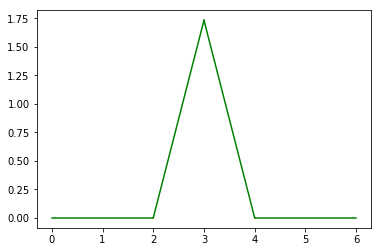

In [2]:
interpret_list_as_figure('F+F-F+F', 2.0, {'+': 60, '-' : 120 })

Generating the Koch snowflake requires us to recursively apply the following rule:

* Replace every occurrence of 'F' by 'F+F-F+F'

The initial string is simply 'F'

In [3]:
def apply_rules_to_string(current_string, rules):
    new_string = ''
    for c in current_string:  # Iterate through each character of the current string
        if c in rules:        # Is there a rule that we can apply to the current character? 
            new_string = new_string + rules[c]   # If yes, replace it by the RHS of the rule
        else:
            new_string = new_string + c          # If not, just pass on the character to the new_string
    return new_string

In [4]:
str0 = 'F'

In [5]:
rules = { 'F': 'F+F-F+F'}

In [6]:
str1 = apply_rules_to_string(str0, rules)
print(str1)

F+F-F+F


In [7]:
str2 = apply_rules_to_string(str1, rules)
print(str2)

F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F


In [8]:
str3 = apply_rules_to_string(str2, rules)
print(str3)

F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F+F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F+F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F


In [9]:
str4 = apply_rules_to_string(str3, rules)
print(str4)

F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F+F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F+F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F+F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F+F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F+F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F+F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F+F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F+F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F+F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F+F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F


In [10]:
str5 = apply_rules_to_string(str4, rules)
print(str5)

F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F+F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F+F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F+F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F+F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F+F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F+F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F+F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F+F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F+F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F+F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F+F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F+F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F+F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F+F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F+F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F+F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F+F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F+F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F+F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F+F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F-F+F-F+F+F+F-F+F+F+F-F+F+

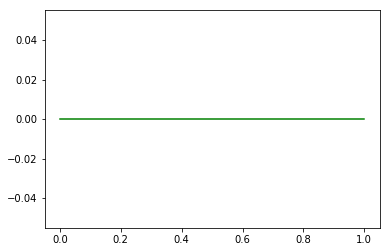

In [11]:
interpret_list_as_figure(str0, 1.0, {'+': 60, '-' : 120 })

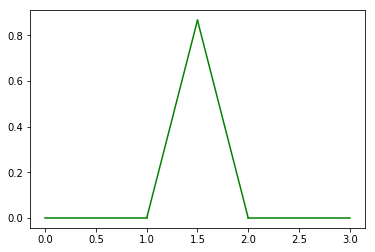

In [12]:
interpret_list_as_figure(str1, 1.0, {'+': 60, '-' : 120 })

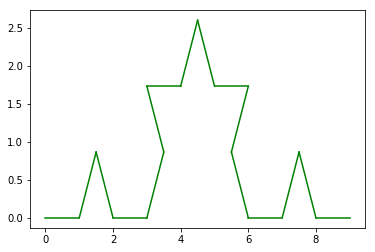

In [13]:
interpret_list_as_figure(str2, 1.0, {'+': 60, '-' : 120 })

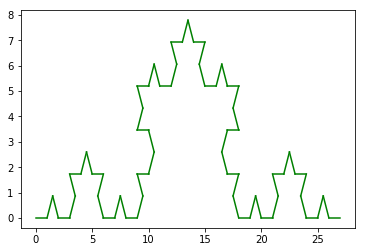

In [14]:
interpret_list_as_figure(str3, 1.0, {'+': 60, '-' : 120 })

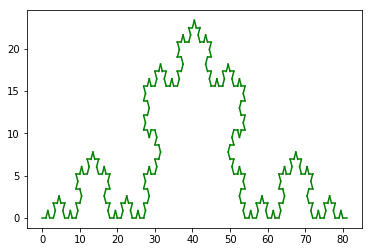

In [15]:
interpret_list_as_figure(str4, 1.0, {'+': 60, '-' : 120 })

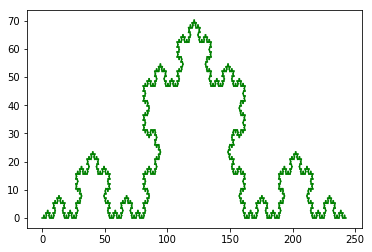

In [16]:
interpret_list_as_figure(str5, 1.0, {'+': 60, '-' : 120 })

In [17]:
def draw_fractal(rules, angles, start_string, n=5):
    s = start_string
    for i in range(n):
        s = apply_rules_to_string(s, rules)
    interpret_list_as_figure(s, 1.0, angles)

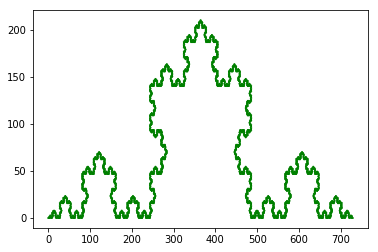

In [18]:
draw_fractal(rules, {'+': 60, '-' : 120 }, 'F', 6 )

In [ ]:
draw_fractal(rules, {'+': 80, '-' : 160 }, 'F', 6 )

In [20]:
rules = { 'X': 'Y-F-Y', 'Y': 'X+F+X'}

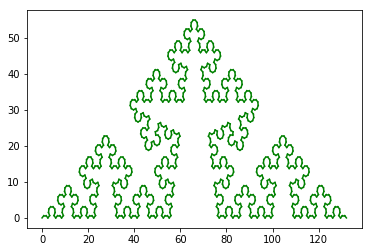

In [21]:
draw_fractal(rules, {'+': 40, '-' : 80 }, 'X', 10)

For more complicated figures, we introduce two new "commands",
`[` : push the current position and angle to the stack,
`]`: pop the last saved position and angle from stack.


* variables : X F
* constants : + − [ ]
* start  : X
* rules  : (X → F[−X][X]F[−X]+FX), (F → FF)
* angle  : 25°

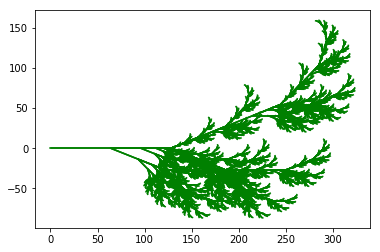

In [24]:
rules={'X':'F[-X][X]F[-X]+FX', 'F': 'FF'}
angles = {'+':25, '-':25}
start_str = 'X'
draw_fractal(rules, angles, start_str, 7)
